# Handwritten Digit Recognition using DNN (MNIST Dataset)

The training is stopped when the accuracy is reached more than 99%. The testing accuracy is almost 98%. This is an acceptable result.

### **Importing the required modules**

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

### **Getting the data**

<class 'numpy.ndarray'>
5


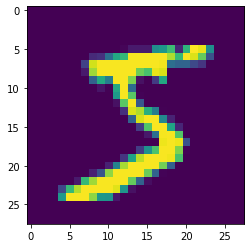

In [11]:
mnist = keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

#normalize the data
training_images = training_images/255.0
test_images     = test_images/255.0

print(type(training_images))

plt.imshow(training_images[0])
print(training_labels[0])

### **Callbacks**

In [3]:
#the callback that runs when the training reaches 99%

class MyCallback(keras.callbacks.Callback):

  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') >= 0.99):
      print("Reached 99% accuracy so cancelling training!")
      self.model.stop_training = True

### **Create the model, compile and fit it**

In [4]:
#create the model
model = keras.models.Sequential([
                                    
                  keras.layers.Flatten(input_shape=(28,28)),
                  keras.layers.Dense(256, activation='relu'),
                  keras.layers.Dense(10, activation='softmax')
                  ])

In [5]:
#compile the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
#fit the model
_callback = MyCallback()
model.fit(training_images, training_labels, epochs=10, callbacks=[_callback])

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 15s 245us/sample - loss: 0.2250 - accuracy: 0.9352
Epoch 2/10
60000/60000 [==============================] - 15s 258us/sample - loss: 0.0924 - accuracy: 0.9720
Epoch 3/10
60000/60000 [==============================] - 10s 170us/sample - loss: 0.0611 - accuracy: 0.9814
Epoch 4/10
60000/60000 [==============================] - 10s 167us/sample - loss: 0.0439 - accuracy: 0.9860
Epoch 5/10
60000/60000 [==============================] - 22s 363us/sample - loss: 0.0324 - accuracy: 0.9898
Epoch 6/10
60000/60000 [==============================] - 9s 144us/sample - loss: 0.0252 - accuracy: 0.9921


In [7]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 2s 203us/sample - loss: 0.0782 - accuracy: 0.9767


[0.07817119654597045, 0.9767]

In [8]:
classifications = model.predict(test_images)

The number is:  6


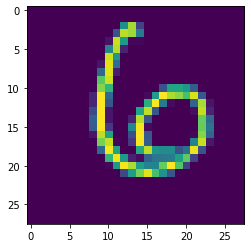

In [13]:
print("The number is: ", np.where(classifications[100] == np.amax(classifications[100]))[0][0])
plt.imshow(test_images[100])

In [15]:
classifications[101]

array([9.9999368e-01, 2.2338100e-11, 8.8630845e-09, 1.3280604e-11,
       7.7507040e-16, 7.5492351e-10, 6.2708441e-06, 2.8128906e-09,
       4.5396057e-14, 1.2063844e-10], dtype=float32)